# Gen AI powered marketing chatbot with credit analysis

### Import Libraries

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import f_oneway 
from scipy.stats import ttest_ind 
from scipy.stats import chi2_contingency

### Load Dataframe

In [163]:
df = pd.read_csv('loan_approval_dataset.csv')

In [164]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


### Checking Dataframe shape

In [165]:
df.shape

(4269, 13)

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


### Data Summary

In [167]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


## Data Cleaning

### Finding the number of missing values in each column

In [168]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

### Checking for duplicates

In [169]:
df.duplicated(keep=False).sum()

0

### Convert Values in a column in Absolute values

In [170]:
df[' residential_assets_value'] = df[' residential_assets_value'].abs()
(df[' residential_assets_value'] < 0).sum()

0

### Remove Whitespace from columns

In [171]:
# Remove leading spaces from column names
df.rename(columns=lambda x: x.strip(), inplace=True)

# Removing white spaces from values in the dataframe
df = df.map(lambda x: x.strip() if isinstance(x, str) else x)

In [172]:
df.info()# Remove leading spaces from column names
df.rename(columns=lambda x: x.strip(), inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


#### Adding CIBIL Rating column

## Adding New Colums to the Dataframe



In [173]:
# Adding CIBIL Rating column with values (Poor, Average, Good and Excellent)

def cibil_rating(value):
    if 300 <= value <= 549:
        return "Poor"
    elif 550 <= value <= 649:
        return "Average"
    elif 650 <= value <= 749:
        return "Good"
    elif 750 <= value <= 900:
        return "Excellent"
    else:
        return "Error"
    
df['CIBIL_rating'] = df['cibil_score'].apply(cibil_rating)

#### Adding income_level Column

In [174]:
def income_level(value):
    if 100000 <= value <= 1000000:
        return "Low"
    elif 1000001 <= value <= 4000000:
        return "Low-Middle"
    elif 4000001 <= value <= 7500000:
        return "Upper-Middle"
    elif 7500001 <= value <= 10000000:
        return "High"
    else:
        return "Very High Income"
    
df['income_level'] = df['income_annum'].apply(income_level)

#### Adding loan_rating Column

In [175]:
def loan_rating(value):
    if 100000 <= value <= 10000000:
        return "Bronze"
    elif 10000001 <= value <= 20000000:
        return "Silver"
    elif 20000001 <= value <= 30000000:
        return "Gold"
    elif 30000001 <= value <= 40000000:
        return "Platinum"
    else:
        return "Unknown"
    
df['loan_rating'] = df['loan_amount'].apply(loan_rating)

#### Adding Loan Term Column

In [176]:
def loan_term(value):
    if 0 <= value <= 7:
        return "Short Term"
    elif 8 <= value <= 14:
        return "Intermediate"
    elif 15 <= value <= 20:
        return "Long Term"
    else:
        return "Unknown"
    
df['loan_term_type'] = df['loan_term'].apply(loan_term)

#### Adding Dependents Level Column

In [177]:
def dependents(value):
    if 0 <= value <= 1:
        return "Low"
    elif 2 <= value <= 3:
        return "Moderate"
    elif 4 <= value <= 5:
        return "High"
    else:
        return "Unknown"
    
df['dependent_level'] = df['no_of_dependents'].apply(dependents)

In [178]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,CIBIL_rating,income_level,loan_rating,loan_term_type,dependent_level
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,Excellent,High,Gold,Intermediate,Moderate
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,Poor,Upper-Middle,Silver,Intermediate,Low
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,Poor,High,Gold,Long Term,Moderate
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,Poor,High,Platinum,Intermediate,Moderate
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,Poor,High,Gold,Long Term,High


In [179]:
#### Adding new column name and dob and filling it with fake data using Faker library

!pip install Faker

from faker import Faker
import pandas as pd
import random


fake = Faker()
# Generate fake data for name and date of birth for 4269 rows
names = [fake.name() for _ in range(4269)]
dob_list = [fake.date_of_birth(minimum_age=18, maximum_age=65) for _ in range(4269)] #Age: Most banks and NBFCs offer personal loans to applicants in the age group of 18 years to 65 years. Various public sector banks also offer personal loans to pensioners on the basis of their pension income.

names

dob_list

# Add fake data to DataFrame
df['name'] = names
df['date_of_birth'] = dob_list
df

# Get the list of existing columns in the DataFrame
existing_columns = df.columns.tolist()

print(existing_columns)

# Rearrange the columns to place 'name' and 'date_of_birth' as 2nd and 3rd columns respectively
new_columns_order = ['loan_id', 'name', 'date_of_birth', 'no_of_dependents', 'education', 'self_employed', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value', 'loan_status', 'CIBIL_rating', 'income_level', 'loan_rating', 'loan_term_type', 'dependent_level']

# Reorder the columns in the DataFrame
df = df[new_columns_order]

df

['loan_id', 'no_of_dependents', 'education', 'self_employed', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value', 'loan_status', 'CIBIL_rating', 'income_level', 'loan_rating', 'loan_term_type', 'dependent_level', 'name', 'date_of_birth']


,loan_id,name,date_of_birth,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,CIBIL_rating,income_level,loan_rating,loan_term_type,dependent_level
0,1,Craig Johnson,2001-11-03,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,Excellent,High,Gold,Intermediate,Moderate
1,2,Dustin Scott,1964-06-12,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,Poor,Upper-Middle,Silver,Intermediate,Low
2,3,Ms. Janice Morton,1971-09-20,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,Poor,High,Gold,Long Term,Moderate
3,4,Sarah Brown,1965-01-14,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,Poor,High,Platinum,Intermediate,Moderate
4,5,David Davenport,1976-12-19,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,Poor,High,Gold,Long Term,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,Sarah Landry,1964-06-05,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected,Poor,Low,Bronze,Intermediate,High
4265,4266,Erin Oliver,1980-06-17,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved,Average,Low-Middle,Silver,Long Term,Low
4266,4267,Derek Zuniga,1996-02-16,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected,Poor,Upper-Middle,Gold,Long Term,Moderate
4267,4268,Brianna King,1990-08-25,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved,Excellent,Upper-Middle,Silver,Intermediate,Low


## Exploratory Data Analysis

### Customer Segmentation

### Segment according to Income

In [180]:
# Group data based on income_level

income = df['income_level'].value_counts().reset_index()
income = income.rename(columns={'income_level':'income_levels', 'count': "Number of Applicants"})
income

,income_levels,Number of Applicants
0,Upper-Middle,1548
1,Low-Middle,1284
2,High,1047
3,Low,390


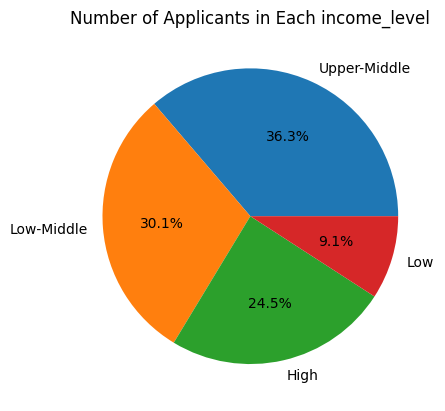

In [181]:
# Ploting the pie chart
plt.pie(income['Number of Applicants'], labels=income['income_levels'], autopct="%1.1f%%")
plt.title("Number of Applicants in Each income_level")
plt.show()

### Segment according to Dependents

In [182]:
# Group based on Number of dependents

dependents = df['dependent_level'].value_counts().reset_index()
dependents = dependents.rename(columns={'count': "Number of Applicants"})
dependents

,dependent_level,Number of Applicants
0,Moderate,1435
1,High,1425
2,Low,1409


### Segment according to Education

In [183]:
education = df['education'].value_counts().reset_index()
# education = education.rename(columns={'education':'Education Levels', 'count': "Number_of_Applicants"})
education

,education,count
0,Graduate,2144
1,Not Graduate,2125


### Segment according to Employment

In [184]:
employment = df['self_employed'].value_counts().reset_index()
employment = employment.rename(columns={'self_employed':'Self Employed', 'count': "Number_of_Applicants"})
employment

,Self Employed,Number_of_Applicants
0,Yes,2150
1,No,2119


## Rate of Loan Approval

### Overall Rate

In [185]:
loans = df['loan_status'].value_counts().reset_index()
loans = loans.rename(columns={'loan_status':'Loan Status', 'count': "Total"})
loans

,Loan Status,Total
0,Approved,2656
1,Rejected,1613


### Loan Approval according to Level of Education

In [186]:
# Grouping data based on Level of Education and Loan approval Status
education = df.groupby(['education', 'loan_status']).size().reset_index()

# Filter to include Approved and Rejected
education = education[education['loan_status'].isin(['Approved', 'Rejected'])]

education

,education,loan_status,0
0,Graduate,Approved,1339
1,Graduate,Rejected,805
2,Not Graduate,Approved,1317
3,Not Graduate,Rejected,808


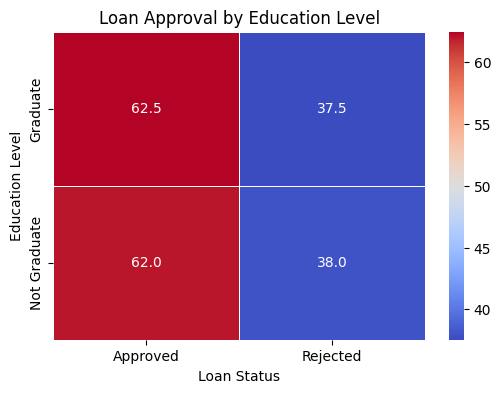

In [187]:
# Pivot Table
pivot_table = education.pivot(index='education', columns='loan_status', values=0)
rows_total = pivot_table.sum(axis=1)
percentage = pivot_table.div(rows_total, axis=0) * 100

# Creating heatmap
plt.figure(figsize=(6,4))
sns.heatmap(percentage, annot=True, fmt='.1f', cmap='coolwarm', linewidth=0.5)

# Creating Labels
plt.title("Loan Approval by Education Level")
plt.xlabel("Loan Status")
plt.ylabel("Education Level")

plt.show()

### Loan Approval according to the type of Employment

In [188]:
# Grouping data based on the Type of Employment and Loan approval Status
employment = df.groupby(['self_employed', 'loan_status']).size().reset_index()

# Filter to include Approved and Rejected
employment = employment[employment['loan_status'].isin(['Approved', 'Rejected'])]
employment = employment.rename(columns={0:'Total'})

employment

,self_employed,loan_status,Total
0,No,Approved,1318
1,No,Rejected,801
2,Yes,Approved,1338
3,Yes,Rejected,812


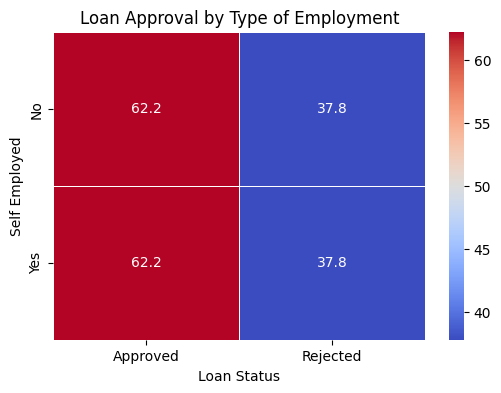

In [189]:
# Pivot Table
pivot_table = employment.pivot(index='self_employed', columns='loan_status', values='Total')
rows_total = pivot_table.sum(axis=1)
percentage = pivot_table.div(rows_total, axis=0) * 100

# Creating heatmap
plt.figure(figsize=(6,4))
sns.heatmap(percentage, annot=True, fmt='.1f', cmap='coolwarm', linewidth=0.5)

# Creating Labels
plt.title("Loan Approval by Type of Employment")
plt.xlabel("Loan Status")
plt.ylabel("Self Employed")

plt.show()

## Loan Approval Rate by CIBIL Rating

### The influence of CIBIL Rating on loan approvals

In [190]:
# Grouping data based on the CIBIL Rating and Loan approval Status
cibil_rating = df.groupby(['CIBIL_rating', 'loan_status']).size().reset_index()
cibil_rating = cibil_rating.rename(columns={0:'Total'})

cibil_rating

,CIBIL_rating,loan_status,Total
0,Average,Approved,681
1,Average,Rejected,2
2,Excellent,Approved,1050
3,Excellent,Rejected,6
4,Good,Approved,740
5,Good,Rejected,5
6,Poor,Approved,185
7,Poor,Rejected,1600


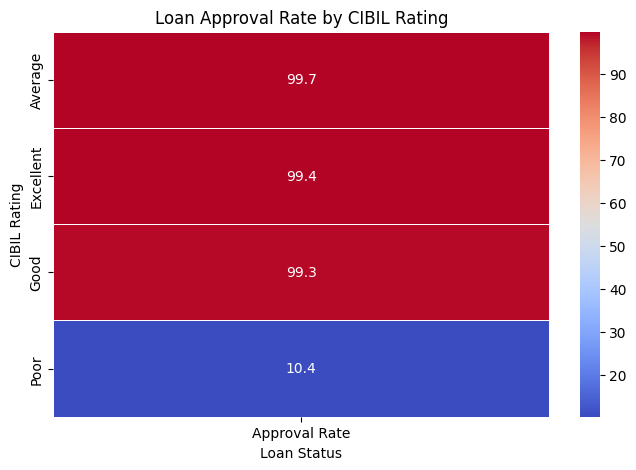

In [191]:
# Pivot Table
pivot_table = cibil_rating.pivot(index='CIBIL_rating', columns='loan_status', values='Total')
pivot_table['Approval Rate'] = pivot_table['Approved'] / (pivot_table['Approved'] + pivot_table['Rejected']) * 100

# Creating heatmap
plt.figure(figsize=(8,5))
sns.heatmap(pivot_table[['Approval Rate']], annot=True, fmt='.1f', cmap='coolwarm', linewidth=0.5)

# Creating Labels
plt.title("Loan Approval Rate by CIBIL Rating")
plt.xlabel("Loan Status")
plt.ylabel("CIBIL Rating")

plt.show()

## Correlation Analysis

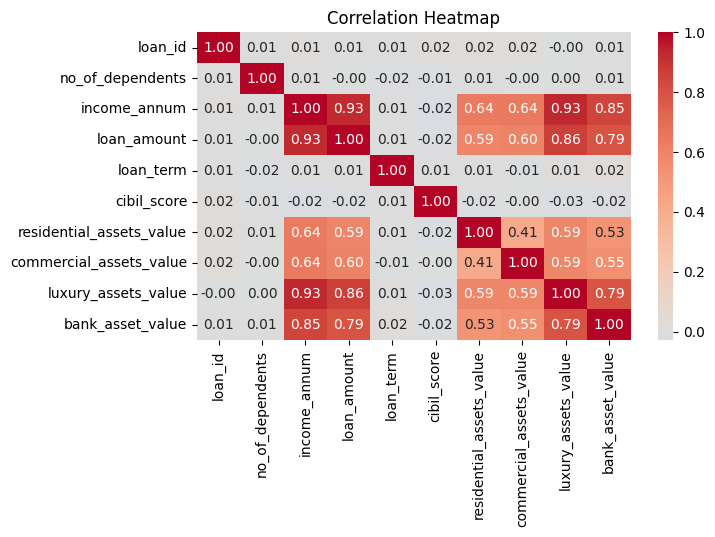

In [192]:
correlation_matrix = df.corr(numeric_only=True)

# Creating heatmap
plt.figure(figsize=(7, 4))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', center=0, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [193]:
# Correlation between asset value and income
assets = ['residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']
income = 'income_annum'

# Calculate the correlation(Pearson Correlation)
correlations = df [assets + [income]].corr()

correlations.head()

,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,income_annum
residential_assets_value,1.000000,0.414799,0.590919,0.527401,0.636824
commercial_assets_value,0.414799,1.000000,0.591128,0.548576,0.640328
luxury_assets_value,0.590919,0.591128,1.000000,0.788517,0.929145
bank_asset_value,0.527401,0.548576,0.788517,1.000000,0.851093
income_annum,0.636824,0.640328,0.929145,0.851093,1.000000


In [194]:
# Correlation between asset value and Loan
assets = ['residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']
loan = 'loan_amount'

# Calculate the correlation(Pearson Correlation)
correlations = df [assets + [loan]].corr()

correlations.head()

,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_amount
residential_assets_value,1.000000,0.414799,0.590919,0.527401,0.594582
commercial_assets_value,0.414799,1.000000,0.591128,0.548576,0.603188
luxury_assets_value,0.590919,0.591128,1.000000,0.788517,0.860914
bank_asset_value,0.527401,0.548576,0.788517,1.000000,0.788122
loan_amount,0.594582,0.603188,0.860914,0.788122,1.000000


## Logistic Regression

In [201]:
def edu_status(status):
    if status == "Graduate":
        return 1
    elif status == "Not Graduate":
        return 0
    else:
        return "Unknown"
df['edu_status'] = df['education'].apply(edu_status)

def type_employment(employment):
    if employment == "Yes":
        return 1
    elif employment == "No":
        return 0
    else:
        return "Unknown"
df['type_employment'] = df['self_employed'].apply(type_employment)

def loan_approval(status):
    if status == "Approved":
        return 1
    elif status == "Rejected":
        return 0
    else:
        return "Unknown"
df['loan_approval'] = df['loan_status'].apply(loan_approval)

In [202]:
df.head()

,loan_id,name,date_of_birth,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,...,bank_asset_value,loan_status,CIBIL_rating,income_level,loan_rating,loan_term_type,dependent_level,edu_status,type_employment,loan_approval
0,1,Craig Johnson,2001-11-03,2,Graduate,No,9600000,29900000,12,778,...,8000000,Approved,Excellent,High,Gold,Intermediate,Moderate,1,0,1
1,2,Dustin Scott,1964-06-12,0,Not Graduate,Yes,4100000,12200000,8,417,...,3300000,Rejected,Poor,Upper-Middle,Silver,Intermediate,Low,0,1,0
2,3,Ms. Janice Morton,1971-09-20,3,Graduate,No,9100000,29700000,20,506,...,12800000,Rejected,Poor,High,Gold,Long Term,Moderate,1,0,0
3,4,Sarah Brown,1965-01-14,3,Graduate,No,8200000,30700000,8,467,...,7900000,Rejected,Poor,High,Platinum,Intermediate,Moderate,1,0,0
4,5,David Davenport,1976-12-19,5,Not Graduate,Yes,9800000,24200000,20,382,...,5000000,Rejected,Poor,High,Gold,Long Term,High,0,1,0


In [203]:
# Seperating the x-axis values

X = df.drop(columns=['loan_id', 'education', 'CIBIL_rating', "income_level", 
                     "loan_rating", 'loan_term_type', 'dependent_level', 'loan_status', "loan_approval", 'self_employed','name','date_of_birth'])

X

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,edu_status,type_employment
0,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1,0
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0,1
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1,0
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1,0
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4264,5,1000000,2300000,12,317,2800000,500000,3300000,800000,1,1
4265,0,3300000,11300000,20,559,4200000,2900000,11000000,1900000,0,1
4266,2,6500000,23900000,18,457,1200000,12400000,18100000,7300000,0,0
4267,1,4100000,12800000,8,780,8200000,700000,14100000,5800000,0,0


In [204]:
# Define the y-axis
y = df['loan_approval']

y.head()

0    1
1    0
2    0
3    0
4    0
Name: loan_approval, dtype: int64

### Importing the Logistic Regression modules

In [205]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [206]:
# Splitting the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

In [207]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [208]:
X_train_scaled

array([[-1.46148376,  1.48642509,  1.54664878, ...,  0.32060948,
        -1.00268097,  0.99266412],
       [ 1.47642896,  0.02091063,  0.58652234, ..., -0.44959563,
         0.9973262 , -1.00739009],
       [-0.87390121, -1.15864979, -1.20129933, ..., -1.18899253,
        -1.00268097,  0.99266412],
       ...,
       [-0.87390121,  1.16472679,  1.01692385, ...,  0.96758177,
        -1.00268097, -1.00739009],
       [ 0.30126387,  0.12814339,  0.56445046, ...,  0.96758177,
        -1.00268097, -1.00739009],
       [-0.87390121,  1.5579136 ,  0.50927078, ...,  0.35141768,
        -1.00268097, -1.00739009]])

In [209]:
X_test_scaled

array([[ 0.88884642, -1.58758085, -1.44408992, ..., -1.43545817,
         0.9973262 , -1.00739009],
       [-0.87390121,  0.66430722,  0.54237859, ...,  0.13576025,
        -1.00268097,  0.99266412],
       [ 0.30126387,  1.05749403,  0.93967229, ...,  1.1832392 ,
         0.9973262 , -1.00739009],
       ...,
       [ 0.30126387,  1.62940211,  1.70115189, ...,  1.64536226,
        -1.00268097,  0.99266412],
       [ 1.47642896,  1.66514636,  2.48470336, ...,  0.35141768,
        -1.00268097,  0.99266412],
       [-0.28631867, -0.01483363,  0.15612082, ..., -0.20313   ,
        -1.00268097,  0.99266412]])

In [210]:
# Training the data

log_reg = LogisticRegression(random_state=0).fit(X_train_scaled, y_train)

In [211]:
scores = []
names = []
names.append("Logisitic Regression")

In [212]:
log_reg.predict(X_train_scaled)

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [213]:
log_reg.score(X_train_scaled, y_train)

0.9200133868808568

In [214]:
# Application of model to a new dataset
log_reg_score = log_reg.score(X_test_scaled, y_test)
print("Logistic Regression Accuracy: ", log_reg_score)

Logistic Regression Accuracy:  0.912568306010929


In [215]:
# Predict 

# log_reg_predict = log_reg.predict(X_test)

In [216]:
# # Accuracy
# score_log_reg = accuracy_score(y_test, log_reg_predict)

# print("Logistic Regression Accuracy: ", score_log_reg)

In [217]:
scores.append(log_reg_score)

### Random Forest 

In [218]:
clf = RandomForestClassifier()
names.append("RandomForest")
clf.fit(X_train, y_train)

RandomForestClassifier()

In [219]:
y_pred = clf.predict(X_test)
score = accuracy_score(y_test, y_pred)
scores.append(score)
print("Accuracy: ", score)

Accuracy:  0.9804839968774395


### Model  Comparison

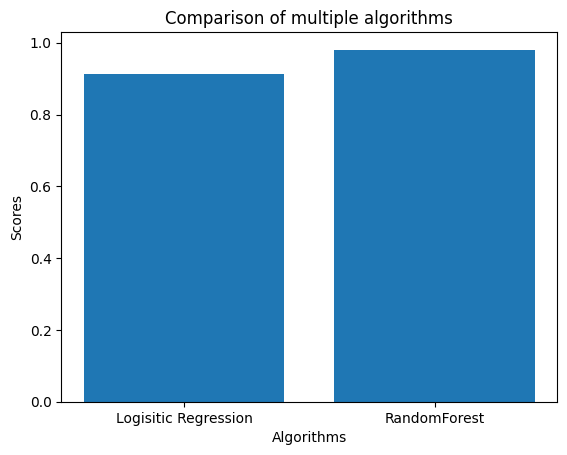

In [220]:
plt.bar(names, scores)
plt.xlabel("Algorithms")
plt.ylabel("Scores")
plt.title("Comparison of multiple algorithms")
plt.show()

### Save data frame as csv file

In [221]:
# Define the file path where you want to save the CSV file
file_path = 'updated_data.csv'

# Save the DataFrame to a CSV file
df.to_csv(file_path, index=False)

print(f'DataFrame saved as CSV file at: {file_path}')

DataFrame saved as CSV file at: updated_data.csv


### Creating sqlite database from the data
Converting CSV data into an SQL database using Python and pandas for data manipulation and SQLite for database operations.

In [222]:
df

,loan_id,name,date_of_birth,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,...,bank_asset_value,loan_status,CIBIL_rating,income_level,loan_rating,loan_term_type,dependent_level,edu_status,type_employment,loan_approval
0,1,Craig Johnson,2001-11-03,2,Graduate,No,9600000,29900000,12,778,...,8000000,Approved,Excellent,High,Gold,Intermediate,Moderate,1,0,1
1,2,Dustin Scott,1964-06-12,0,Not Graduate,Yes,4100000,12200000,8,417,...,3300000,Rejected,Poor,Upper-Middle,Silver,Intermediate,Low,0,1,0
2,3,Ms. Janice Morton,1971-09-20,3,Graduate,No,9100000,29700000,20,506,...,12800000,Rejected,Poor,High,Gold,Long Term,Moderate,1,0,0
3,4,Sarah Brown,1965-01-14,3,Graduate,No,8200000,30700000,8,467,...,7900000,Rejected,Poor,High,Platinum,Intermediate,Moderate,1,0,0
4,5,David Davenport,1976-12-19,5,Not Graduate,Yes,9800000,24200000,20,382,...,5000000,Rejected,Poor,High,Gold,Long Term,High,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,Sarah Landry,1964-06-05,5,Graduate,Yes,1000000,2300000,12,317,...,800000,Rejected,Poor,Low,Bronze,Intermediate,High,1,1,0
4265,4266,Erin Oliver,1980-06-17,0,Not Graduate,Yes,3300000,11300000,20,559,...,1900000,Approved,Average,Low-Middle,Silver,Long Term,Low,0,1,1
4266,4267,Derek Zuniga,1996-02-16,2,Not Graduate,No,6500000,23900000,18,457,...,7300000,Rejected,Poor,Upper-Middle,Gold,Long Term,Moderate,0,0,0
4267,4268,Brianna King,1990-08-25,1,Not Graduate,No,4100000,12800000,8,780,...,5800000,Approved,Excellent,Upper-Middle,Silver,Intermediate,Low,0,0,1


In [225]:
# ## Creating table in database
# # Create a cursor object
# cursor = conn.cursor()

# # # SQL command to drop table if it exists
# # drop_table_query = "DROP TABLE IF EXISTS loan_data;"
# # cursor.execute(drop_table_query)

# # Create a table based on DataFrame columns
# create_table_query = '''CREATE TABLE loan_data (
#                         loan_id INT NOT NULL,
#                         name VARCHAR(255) NOT NULL,  
#                         date_of_birth DATE NOT NULL,  
#                         no_of_dependents INT NOT NULL,
#                         education VARCHAR(255) NOT NULL,
#                         self_employed VARCHAR(255) NOT NULL,
#                         income_annum INT NOT NULL,
#                         loan_amount INT NOT NULL,
#                         loan_term INT NOT NULL,
#                         cibil_score INT NOT NULL,
#                         residential_assets_value INT NOT NULL,
#                         commercial_assets_value INT NOT NULL,
#                         luxury_assets_value INT NOT NULL,
#                         bank_asset_value INT NOT NULL,
#                         loan_status VARCHAR(255) NOT NULL,
#                         CIBIL_rating VARCHAR(255) NOT NULL,
#                         income_level VARCHAR(255) NOT NULL,
#                         loan_rating VARCHAR(255) NOT NULL,
#                         loan_term_type VARCHAR(255) NOT NULL,
#                         dependent_level VARCHAR(255) NOT NULL,
#                         edu_status INT NOT NULL,
#                         type_employment INT NOT NULL,
#                         loan_approval INT NOT NULL,
#                         PRIMARY KEY (loan_id)
#                     );
#                 '''
# cursor.execute(create_table_query)

OperationalError: table loan_data already exists

In [ ]:
# # Check if the table exists in SQLite
# cursor.execute("SELECT name FROM sqlite_master WHERE type='table' AND name='loan_data';")
# table_exists = cursor.fetchone()

# if table_exists:
#     print("Table 'loan_data' exists.")
# else:
#     print("Table 'loan_data' does not exist.")


In [ ]:
# # Execute a SQL query to get information about table columns in SQLite
# cursor.execute("PRAGMA table_info('loan_data');")
# columns_info = cursor.fetchall()

# # Print column information
# print("Columns in 'loan_data' table:")
# for column in columns_info:
#     print(column[1], column[2])  # column[1] contains column name, column[2] contains column data type


### Insert Data

In [ ]:
# # Insert data into the table
# df.to_sql('loan_data', conn, if_exists='append', index=False)

In [ ]:
# # Commit changes and close connection
# conn.commit()
# conn.close()


### View Data

In [1]:
import pandas as pd

# Connect to SQLite database
conn = sqlite3.connect('credit_score_loan_data.db')

# Read data from the Customer table into a DataFrame
customer_df = pd.read_sql_query("SELECT * FROM loan_data", conn)

# Close the connection
conn.close()

NameError: name 'sqlite3' is not defined

In [ ]:
# customer_df.head()

In [ ]:
# from langchain_community.utilities import SQLDatabase

# db = SQLDatabase.from_uri("sqlite:///credit_score_loan_data.db")
# print(db.dialect)
# print(db.get_usable_table_names())
# db.run("SELECT * FROM loan_data LIMIT 10;")

In [9]:
import os
from dotenv import load_dotenv

os.environ["OPENAI_API_TYPE"]="azure"
os.environ["OPENAI_API_VERSION"]="2023-05-15"
os.environ["OPENAI_API_BASE"]="https://genai-eus-001.openai.azure.com/"
os.environ["OPENAI_API_KEY"]="73058fbaf725484db365bc0c942068ea" 
os.environ["OPENAI_CHAT_MODEL"]="gpt35turbo16k" 

In [10]:
from langchain.chat_models import AzureChatOpenAI
import openai
os.environ["OPENAI_CHAT_MODEL"]="GPT35TURBO" # Use name of deployment
llm = openai.AzureOpenAI(
        azure_endpoint="https://oai-eus2-001.openai.azure.com/",
        api_key="70ac8a66915a49cfb6c833f694d7ed24",
        api_version="2023-05-15"
)
llm

### Key components for text to SQL:
Text-to-SQL systems involve several stages to convert natural language queries into runnable SQL:

Natural language processing:
Analyze the user’s input query
Extract key elements and intent
Convert to a structured format
SQL generation:
Map extracted details into SQL syntax
Generate a valid SQL query
Database query:
Run the AI-generated SQL query on the database
Retrieve results
Return result

Using natural language processing (NLP) to unlock new opportunities for accessing data through intuitive SQL queriess to the user

In [ ]:
# def generate_sql_query(user_input):
#     new_prompt = f""" 
#   ## Problem Statement
#   As an expert in SQLite, your task is to assist users with database queries related to loan data by generating syntactically correct SQLite queries following specific guidelines.

#   ## Input Question
#   User input: {user_input}

#   ## Guidelines for Query Generation
#   1. If the User input specifies a specific number of examples, limit the query results using `LIMIT`.
#   2. Query only name column and the other necessary columns from tables; avoid querying all columns, the name column must always be included.
#   3. Use column names from the provided database schema and avoid querying non-existent columns.
#   4. Consider loan_approval column: 0 for loan denial, 1 for loan approval. If loan_approval is 1, indicate loan can be given but do not say it's been approved.
#   5. Only generate one SQL query in the reponse, it should be the most relevant SQL query.
#   6. For User input not related to loan approval, banking, credit analysis return a response "Not able to generate query."
#   6. Find the keywords in the User input which are similar to or match the loan data table's columns and include all of those columns in the resultant SQL query. Do this only if User input is related to loan approval, banking, credit analysis.


#   ## Database Schema
#   ```sql
#   CREATE TABLE loan_data (
#   loan_id INT NOT NULL,
#   name VARCHAR(255) NOT NULL,
#   date_of_birth DATE NOT NULL,
#   no_of_dependents INT NOT NULL,
#   education VARCHAR(255) NOT NULL,
#   self_employed VARCHAR(255) NOT NULL,
#   income_annum INT NOT NULL,
#   loan_amount INT NOT NULL,
#   loan_term INT NOT NULL,
#   cibil_score INT NOT NULL,
#   residential_assets_value INT NOT NULL,
#   commercial_assets_value INT NOT NULL,
#   luxury_assets_value INT NOT NULL,
#   bank_asset_value INT NOT NULL,
#   loan_status VARCHAR(255) NOT NULL,
#   CIBIL_rating VARCHAR(255) NOT NULL,
#   income_level VARCHAR(255) NOT NULL,
#   loan_rating VARCHAR(255) NOT NULL,
#   loan_term_type VARCHAR(255) NOT NULL,
#   dependent_level VARCHAR(255) NOT NULL,
#   edu_status INT NOT NULL,
#   type_employment INT NOT NULL,
#   loan_approval INT NOT NULL,
#   PRIMARY KEY (loan_id)
#   );
# Response Format
# Provide only the generated single SQL query without any additional characters or phrases.
# Avoid including any text other than the SQL query.
# For queries that cannot be translated into SQL, return "Not able to generate query."
# Query only name column and the other necessary columns from tables; avoid querying all columns, the name column must always be included.
# Find the keywords in the User input which are similar to or match the loan data table's columns and include all of those columns in the resultant SQL query. Do this only if User input is related to loan approval, banking, credit analysis.
# Task Examples:

# User: "Can loan be disbursed to loan id 3?"
# Response: "SELECT loan_approval, name FROM loan_data WHERE loan_id = 3;"

# User: "What is your name?"
# Response: "Not able to generate query."

# User: "What is cibil rating of loan id 34?"
# Response: "SELECT CIBIL_rating, name FROM loan_data WHERE loan_id = 3;"

# User: "Can loan be disbursed to loan id 5 based on their cibil rating?"
# Response: "SELECT loan_approval, CIBIL_rating, name FROM loan_data WHERE loan_id = 3;"

#     """
#     prompt = f"""

#     ## Problem Statement:
#     You are a knowledgeable and friendly SQLite expert assisting users with database queries. Given an input question, create a syntactically correct SQLite query that adheres to specific guidelines. Give 5 outputs.
    
#     ## Input Question:
#     User: {user_input}

#     ## Guidelines for Query Generation:
#     1. If the user specifies a specific number of examples to obtain, limit the query results using the `LIMIT` clause.
#     2. Never query for all columns from a table; only query the columns necessary to answer the question and the name column.
#     3. Use only the column names from the provided database schema (see below). Avoid querying non-existent columns.
#     4. Utilize the `date('now')` function to get the current date when required, such as for questions involving "today."
#     5. Consider the loan_approval column: 0 indicates loan denial, while 1 indicates loan approval.
#     6. If loan approval is 1 then return answer as loan can be given do not say it has been approved.

#     ## Database Schema:
#     Use the following table schema when creating your queries:
#     ```sql
#     CREATE TABLE loan_data (
#     loan_id INT NOT NULL,
#     name VARCHAR(255) NOT NULL,
#     date_of_birth DATE NOT NULL,
#     no_of_dependents INT NOT NULL,
#     education VARCHAR(255) NOT NULL,
#     self_employed VARCHAR(255) NOT NULL,
#     income_annum INT NOT NULL,
#     loan_amount INT NOT NULL,
#     loan_term INT NOT NULL,
#     cibil_score INT NOT NULL,
#     residential_assets_value INT NOT NULL,
#     commercial_assets_value INT NOT NULL,
#     luxury_assets_value INT NOT NULL,
#     bank_asset_value INT NOT NULL,
#     loan_status VARCHAR(255) NOT NULL,
#     CIBIL_rating VARCHAR(255) NOT NULL,
#     income_level VARCHAR(255) NOT NULL,
#     loan_rating VARCHAR(255) NOT NULL,
#     loan_term_type VARCHAR(255) NOT NULL,
#     dependent_level VARCHAR(255) NOT NULL,
#     edu_status INT NOT NULL,
#     type_employment INT NOT NULL,
#     loan_approval INT NOT NULL,
#     PRIMARY KEY (loan_id)
#     );
#     Response Format:
#     Your response should strictly adhere to the following format:
    
#     Provide the generated SQL query only , without any additional characters or phrases.
#     Ensure the response includes all TEXT and DATETIME data type columns from the JOIN tables used in the query.
#     Avoid including any text other than the SQL query in the response.
#     Limitations:
#     For irrelevant questions or queries that cannot be translated into a SQL query, return a string specifying "Not able to generate query."

#     """
#     system =f"""
#     You are an SQLite expert and a helpful, cheerful database assistant. Given an input question {user_input}, create a syntactically correct SQLite query.
#     Unless the user specifies in the question a specific number of examples to obtain. Never query for all columns from a table. You must query only the columns that are needed to answer the question and the name column even if not asked. 
    
#     Pay attention to use only the column names you can see in the tables below. Be careful to not query for columns that do not exist. 
#     Also, pay attention to which column is in which table.Pay attention to use date('now') function to get the current date,
#     if the question involves "today". If asked if we can disburse loan to a particular user, ask for the name of the user if not unique or given clearly.
#     If the loan approval is 0 then we cannot give loan if it is 1 then we can give loan.
   
     
#     Given the following database schema :
#     Only use the following tables when creating your answers:
    
#     CREATE TABLE loan_data (
#                         loan_id INT NOT NULL,
#                         name VARCHAR(255) NOT NULL,  
#                         date_of_birth DATE NOT NULL,  
#                         no_of_dependents INT NOT NULL,
#                         education VARCHAR(255) NOT NULL,
#                         self_employed VARCHAR(255) NOT NULL,
#                         income_annum INT NOT NULL,
#                         loan_amount INT NOT NULL,
#                         loan_term INT NOT NULL,
#                         cibil_score INT NOT NULL,
#                         residential_assets_value INT NOT NULL,
#                         commercial_assets_value INT NOT NULL,
#                         luxury_assets_value INT NOT NULL,
#                         bank_asset_value INT NOT NULL,
#                         loan_status VARCHAR(255) NOT NULL,
#                         CIBIL_rating VARCHAR(255) NOT NULL,
#                         income_level VARCHAR(255) NOT NULL,
#                         loan_rating VARCHAR(255) NOT NULL,
#                         loan_term_type VARCHAR(255) NOT NULL,
#                         dependent_level VARCHAR(255) NOT NULL,
#                         edu_status INT NOT NULL,
#                         type_employment INT NOT NULL,
#                         loan_approval INT NOT NULL,
#                         PRIMARY KEY (loan_id)
#                     );
    

#         INSTRUCTIONS:
#     1. Strictly use the given table schemas while forming the result.
#     2. Ensure that the response contains only the SQL query and no additional characters.
#     3. The response should include all TEXT and DATETIME data type columns from the JOIN tables used in the query.
#     4. Ensure that response should not contain any text other then SQL query. Refrain from using "you can use the following SQL query:
#     " or any other similiar phrases in response
#     5. Only gnerate one SQL query in the reponse, it should be the most relevant SQL query.
#     6. Do similarity search in 
    
    
#        LIMITATIONS: for irrelevant questions, return a string specifying "Not able to generate query".
#     """
#     response = llm.chat.completions.create(
#     model="GPT35TURBO",
#     temperature=0.0,
#     max_tokens=1000,
#     top_p=1,
#     messages=[
#         {"role": "user", "content": new_prompt}
#     ],
#     )
    
    
    
#     sql_query = response.choices[0].message.content
#     return sql_query


In [ ]:
# user_input = "Can loan be disbursed?"
# xx=generate_sql_query(user_input)
# type(xx)
# xx

In [ ]:
# xx=generate_sql_query("What are you?")
# type(xx)
# xx
# result = xx

In [ ]:
# xx=generate_sql_query("What is your name?")
# type(xx)
# xx

In [ ]:
# user_input = "What is value of assets in bank of loan id 28?"
# xx=generate_sql_query(user_input)
# type(xx)
# xx

In [ ]:
# db = SQLDatabase.from_uri("sqlite:///credit_score_loan_data.db")
# result = db.run(xx)
# print(result)

In [ ]:
# def get_user_input():
#     # user_input = input("Enter your query or question: ")
#     user_input = "Can loan be disbursed to loan id 1?"
#     return user_input

In [ ]:
# from langchain_community.utilities import SQLDatabase

# def execute_sql_query(sql_query):
#     # Connect to the database and execute the SQL query
#     db = SQLDatabase.from_uri("sqlite:///credit_score_loan_data.db")
#     result = db.run(sql_query)
#     # print(result)
#     return result


In [ ]:
# def process_query_result(result, user_query):
#     prompt = f"""

#     ## Problem Statement:
#     You are a helpful assistant chatbot that interacts with a database to answer user query. Given a sql query result {result} from the loan data table, and the user query {user_query} , 
#     generate a human-readable answer of the information present in the sql query result, answering only the information relevant to the user query. 
    
#     ## Input Data:
#     The sql query result contains the name column:
#      - name: Name of the loan applicant
#      And either of the following columns:
#     - loan_id: Unique identifier for each loan
#     - date_of_birth: Date of birth of the loan applicant
#     - no_of_dependents: Number of dependents of the loan applicant
#     - education: Education level of the loan applicant
#     - self_employed: Employment status of the loan applicant
#     - income_annum: Annual income of the loan applicant
#     - loan_amount: Amount of loan applied for
#     - loan_term: Term of the loan in months
#     - cibil_score: Credit score of the loan applicant
#     - residential_assets_value: Value of residential assets
#     - commercial_assets_value: Value of commercial assets
#     - luxury_assets_value: Value of luxury assets
#     - bank_asset_value: Value of assets in bank
#     - loan_status: Status of the loan application (approved or rejected)
#     - CIBIL_rating: Credit rating of the loan applicant
#     - income_level: Income level of the loan applicant
#     - loan_rating: Rating of the loan application
#     - loan_term_type: Type of loan term (short-term or long-term)
#     - dependent_level: Level of dependence on loan
#     - edu_status: Education status of the loan applicant
#     - type_employment: Type of employment of the loan applicant
#     - loan_approval: Approval status of the loan (1 for approved, 0 for rejected)
    
    
#     ## Guidelines:
#     - Ensure your response is grammatically correct, concise, informative, and easy to understand.
#     - Include key statistics and trends from the sql query result along with the name of the user which is in the sql query result.
#     - Use natural language and avoid technical jargon in your response. 
#     - If the sql query result is "Not able to generate query." then respond saying I do not have the answer to your question currently, please ask a more specific question mentioning a unique loan id of the user in your question." as your response.
#     - Ensure your response only contains a human readable answer and nothing more.
#     - Consider the loan_approval column: 0 indicates loan denial, while 1 indicates loan approval.

#     ## Task Examples:
#     user query: "What is cibil rating of loan id 34?"
#     sql query result: [('Excellent', 'Charles Pierce')]
#     your response : Cibil rating of Charles Pierce with loan id 34 is Excellent.
    
#     user query: "Can loan be disbursed to loan id 5 based on their cibil rating?"
#     sql query result: [(1, 'Excellent', 'Mrs. Yvonne Young')]
#     your response : The cibil rating of Mrs. Yvonne Young is excellent based on that and other factors like their asset value and their bank rating the loan can be approved to Mrs. Yvonne Young.

#     user query: "Can loan be disbursed to loan id 2?"
#     sql query result: [(0, 'Charles King')]
#     your response: Loan cannot be disbursed to Charles King based on many factors lik etheir cibil rating, assets value, loan rating etc.

#     user query: "What are you?"
#     sql query result: 'Not able to generate query.'
#     your response: I do not have the answer to your question currently, please ask a more specific question mentioning a unique loan id of the user in your question.
    
#     """
#     response = llm.chat.completions.create(
#     model="GPT35TURBO",
#     temperature=0.0,
#     max_tokens=1000,
#     top_p=1,
#     messages=[
#         {"role": "user", "content": prompt}
#     ],
#     )
    
#     answer = response.choices[0].message.content
#     return answer


In [ ]:
# from langchain_community.utilities import SQLDatabase

# db = SQLDatabase.from_uri("sqlite:///credit_score_loan_data.db")
# db.run(xx)

In [ ]:
# def main():
#     user_input = get_user_input()
#     sql_query = generate_sql_query(user_input)
#     result = execute_sql_query(sql_query)
print(result)
response = process_query_result(result,user_input)
print(response)

# if __name__ == "__main__":
#     main()

In [ ]:
# # add user table with unique id- aadhar id (national_id) current income current cibil rating 

# what is credit score of jeremy.
# which jeremy (name containing jeremy) if multiple records, then provide additional details
# ans jeremy john
# run sql 
# not able to find record, can you give jeremy's ssn number or mobile number 
# add date when applied for loan
# # use different data - who are not in database based on their cibil rating and some data (based on age, salary) how much data is publicially available
# Targetting their own customer s who don't take loan-v
# when was loan rejected so marketing email should not go to them                                                         
# # mortgage loan messages examples: https://gocrm.io/blog/mortage-lender-sms-message-example/
 
# datasets for loans: https://www.kaggle.com/code/janiobachmann/bank-marketing-campaign-opening-a-term-deposit/input 
# https://www.kaggle.com/code/farzadnekouei/imbalanced-personal-bank-loan-classification/input
                                                     
                                                         

In [ ]:
# df.info()

#define demographic segments
segments = ['young_professionals', 'retired_individuals', 'homeowners', 'students_parents']

In [ ]:
# import pandas as pd
# from chromadb.client import ChromaClient

# # Assuming you have loaded your loan data into a pandas DataFrame
# loan_data = pd.read_csv('loan_data.csv')

# # Connect to ChromaDB
# chroma_client = ChromaClient('your_api_key', 'your_workspace_id')

# # Define segmentation categories for approved and non-approved users
# approved_categories = ['young_professionals', 'retired_individuals', 'homeowners', 'students_parents']
# non_approved_categories = ['credit_building', 'debt_consolidation']

# # Segment users into approved and non-approved based on loan_approval status
# approved_users = loan_data[loan_data['loan_approval'] == 1]
# non_approved_users = loan_data[loan_data['loan_approval'] == 0]

# # Create collections for approved users
# for category in approved_categories:
#     approved_collection_name = f'approved_{category}'
#     approved_users_category = approved_users[approved_users['category_column'] == category]  # Specify category_column
#     # Convert DataFrame to JSON records
#     approved_records = approved_users_category.to_dict(orient='records')
#     # Insert records into ChromaDB collection
#     chroma_client.create_collection(approved_collection_name, approved_records)

# # Create collections for non-approved users
# for category in non_approved_categories:
#     non_approved_collection_name = f'non_approved_{category}'
#     non_approved_users_category = non_approved_users[non_approved_users['category_column'] == category]  # Specify category_column
#     # Convert DataFrame to JSON records
#     non_approved_records = non_approved_users_category.to_dict(orient='records')
#     # Insert records into ChromaDB collection
#     # chroma_client.create_collection(non_approved_collection_name, non_approved_records)


In [ ]:
df


# Embedding util

In [ ]:
# # embedding_util.py
# from sentence_transformers import SentenceTransformer

# class EmbeddingUtil:
#     def __init__(self, model_name):
#         self.model = SentenceTransformer(model_name)

#     def generate_embeddings(self, text_data):
#         embeddings = self.model.encode(text_data)
#         return pd.DataFrame(embeddings)

In [ ]:
# import pandas as pd
# from chromadb import ChromaDB

# # Load loan data dataframe
# df = pd.read_csv('loan_data.csv') 

# # Additional categorization functions
# def get_dependent_level(row):
#   if row['no_of_dependents'] == 0:
#     return 'No Dependents'
#   elif row['no_of_dependents'] < 3:  
#     return 'Few Dependents'
#   else:
#     return 'Many Dependents'

# def get_education_level(row):
#   if row['education'] == 'Graduate':
#     return 'Graduate'
#   else:  
#     return 'Non-Graduate'

# # Apply categorization functions  
# df['dependent_level'] = df.apply(get_dependent_level, axis=1)
# df['education_level'] = df.apply(get_education_level, axis=1)

# # Original categorization function
# def categorize_user(row):
#   if row['loan_approval'] == 1:
#      # income/credit checks  
#   return 'Not Approved'

# # Add new category column  
# df['loan_category'] = df.apply(categorize_user, axis=1)

# # Filter approved loans
# df_approved = df[df['loan_approval'] == 1]

# # Connect to ChromaDB
# chromadb = ChromaDB()

# # Insert each category into separate collection
# for cat in df_approved['loan_category'].unique():
#   chromadb.insert_collection(cat, df_approved[df_approved['loan_category']==cat])

# chromadb.close()


Based on the use case provided, here are a few suggestions for how you could leverage education, income, and CIBIL rating for customer segmentation and personalized email generation:

To segment users into relevant marketing groups, you can create categories based on combinations of education level, income, and CIBIL rating. For example:

High Income, Graduate Degree, Excellent CIBIL
High Income, Non-Graduate, Good CIBIL
Moderate Income, Graduate Degree, Fair CIBIL
Low Income, Non-Graduate, Poor CIBIL
The machine learning model used to predict loan approval likelihood could also provide insights into what types of customers are more or less likely to be approved.

This data could then be fed into the AI system to automatically generate unique email content for each segment. For example, an email targeting the "High Income, Graduate Degree, Excellent CIBIL" group may promote high-limit loan offers. Whereas emails for segments more likely to be declined could offer pre-approval checks or ways to improve credit scores. [1]

In [ ]:
# import pandas as pd
# from chromadb import ChromaDB

# # Connect to ChromaDB
# chromadb = ChromaDB()

# # Load loan data 
# df = pd.read_csv('loan_data.csv')

# # Categorize users by education, income, CIBIL score
# def categorize(row):
#   education = row['education']
#   income = row['income_annum'] 
#   cibil = row['CIBIL_rating']

#   if education=='Graduate' and income>100000 and cibil=='Excellent':
#     return 'HighIncomeGraduateExcellent'

#   # add other categories
#   return 'Unknown'

# df['category'] = df.apply(categorize, axis=1)

# # Filter approved loans  
# df_approved = df[df['loan_approval']==1]

# # Insert each category into ChromaDB collection
# for cat in df_approved['category'].unique():

#   collection = chromadb.collection(cat)

#   # Generate personalized email content 
#   content = generate_email(cat)  

#   # Send email 
#   send_email(df_approved[df_approved['category']==cat], content)

# # Close connection
# chromadb.close()


Here are a few ways you could use collections and vector databases to help with generating marketing emails from loan data:

Create a collection in your vector database containing information about each customer like loan amount, repayment history, demographics, etc. The vector database would generate an embedding for each customer record.
You could then query the collection to find customers that are similar in characteristics to those who responded well to previous marketing campaigns. This would help identify good targets for new campaigns.
Additionally, you may want to create collections for your marketing emails/messages themselves. Each email template could be added to a collection where it is embedded.
Then when a campaign is run, you could query the customer collection to find similar customers, and also query the email collection to find the most similar/effective template to use based on past customer interactions and responses.
This would help with campaign personalization and optimization by selecting the right customers and right messages for each individual.
You could also periodically re-embed the customer and email collections to capture any changes in customer behaviors or campaign results over time to continually improve targeting.
The key aspects would be setting up the appropriate collections, selecting embedding models suited to your use case, and querying the collections to find similarities and drive personalized outreach. Let me know if any part of this process needs more clarification.



In [ ]:
# import json
# import requests

# # Connect to ChromaDB 
# chromadb = ChromaDB()

# # COSTAR API endpoint
# endpoint = "https://api.costar.com/v1/generate"

# # Loop through each category collection
# for category in chromadb.list_collections():

#   # Query collection to get user IDs
#   users = chromadb.query(category, {})

#   # Generate prompt template
#   prompt = f"""Category: {category}
#   Dear {{name}},
#   We have the following offer tailored to your profile:
#   {{offer}}
#   Sincerely,
#   Your Bank
#   """

#   # Make API request to COSTAR
#   response = requests.post(endpoint, json={
#     "prompt": prompt,
#     "num_returns": 1
#   })

#   # Get response
#   generated = response.json()["generations"][0]

#   # Extract name and offer
#   name = generated["name"]
#   offer = generated["offer"]

#   # Send personalized email
#   send_email(users, name, offer)

# chromadb.close()


In [ ]:
# loan_options = {
#   "HighIncomeGraduateExcellent": [
#     "High-limit personal loan up to $100k",
#     "Low interest home loan starting at 5%"
#   ],
#   "ModerateIncomeGraduateFair": [
#     "Loan consolidation up to $50k at 7% interest", 
#     "Home renovation loan with 1 year deferred payments"
#   ]
#   # map other categories
# }


Based on the categories stored in the ChromaDB collections, here is one way to generate personalized loan options and send them to an LLM for response generation:

First, define a dictionary mapping each category to relevant loan offers:

In [ ]:
# Here are a few ways you could get email templates and send them to an LLM for personalization: [1]

# Create template files: You can create template files (e.g. HTML, plain text) with placeholders for personalized fields. For example:
# Dear {{name}},We are pleased to offer you a {{loan_type}} loan of ${{loan_amount}}.

# Store templates in database: The templates can be stored in a database/collection with a schema specifying placeholder fields.
# Generate templates programmatically: You can write code to dynamically generate templates by populating placeholders in string templates or template literals. [2]
# Once you have the templates, you would send them to the LLM along with user profile data to populate the placeholders. The LLM response would return the personalized template content that is then used for email sending.

# Some sample Python code using an LLM API could look like:

# # Get user profile 
# profile = get_user_profile(user_id)

# # Get template 
# template = get_template('loan_offer')

# # Call LLM 
# response = call_llm(template, profile)

# # Extract personalized content
# content = response['content'] 

# # Send email
# send_email(user_id, content)


In [ ]:
# import pandas as pd
# from chromadb import ChromaDB
# import requests

# # Connect to ChromaDB
# chromadb = ChromaDB()

# # LLM API endpoint
# llm_url = "https://example-llm-api.com/generate" 

# # Load loan data
# df = pd.read_csv('loan_data.csv')

# # Categorization function
# def categorize(row):
#   # logic to categorize based on education, income, credit score
#   return category

# # Add category column  
# df['category'] = df.apply(categorize, axis=1)

# # Filter approved loans
# df_approved = df[df['loan_approval']==1]

# # Insert each category into collection
# for cat in df_approved['category'].unique():

#   collection = chromadb.collection(cat)

#   collection.insert(df_approved[df_approved['category']==cat])

# # Loop through collections  
# for cat in chromadb.list_collections():

#   users = chromadb.query(cat)

#   # Template with placeholders
#   template = f"Dear {{name}}, we have an offer for {{offer}}"

#   # Call LLM to generate response
#   response = requests.post(llm_url, json={
#     "template": template, 
#     "users": users
#   }).json()

#   # Send personalized emails
#   send_emails(users, response)

# chromadb.close()


Bank marketing strategies can be tailored to different customer segments based on their financial profiles. Here are some targeted marketing approaches for the three categories mentioned:

1. **High CIBIL Rating + High Income**:
   - **Premium Banking Services**: Offer premium banking services such as priority customer support, personalized wealth management advice, and exclusive banking perks to high-income individuals with excellent credit scores.
   - **Credit Card Upgrades**: Provide premium credit card options with higher credit limits, luxury rewards, travel benefits, and concierge services tailored to affluent customers.
   - **Investment Opportunities**: Promote investment products like mutual funds, stocks, and retirement plans to help high-income customers grow their wealth and achieve their financial goals.
   - **Personalized Loan Offers**: Offer low-interest rate loans, mortgage refinancing options, and tailored financing solutions for high-value purchases like homes or vehicles.

2. **High Income + Low CIBIL Rating**:
   - **Credit Building Programs**: Introduce credit building programs and educational resources to help customers improve their credit scores over time through responsible financial management.
   - **Secured Credit Cards**: Offer secured credit card options with low credit limits and collateral requirements to help customers rebuild their credit history and access credit responsibly.
   - **Financial Planning Workshops**: Organize workshops and seminars on financial literacy, budgeting, and credit management to empower customers with the knowledge to improve their financial health.
   - **Debt Consolidation Solutions**: Provide debt consolidation loans or services to help customers manage and consolidate their debts more effectively, reducing financial stress and improving creditworthiness.

3. **Low CIBIL Rating + Low Income**:
   - **Financial Education Programs**: Offer financial literacy programs, online resources, and budgeting tools to help customers with limited incomes make informed financial decisions and improve their financial well-being.
   - **Microfinance Initiatives**: Partner with microfinance institutions to offer microloans, small-scale financing, and community development projects to support low-income individuals and entrepreneurs.
   - **Basic Banking Services**: Provide basic banking services such as no-fee checking accounts, low-cost savings options, and affordable remittance services tailored to customers with modest incomes.
   - **Nontraditional Banking Channels**: Explore innovative banking solutions like mobile banking apps, digital wallets, and online banking platforms to enhance accessibility and convenience for customers in this segment.

These marketing strategies can be further customized based on market research, customer feedback, regulatory considerations, and the specific needs of each customer segment. Effective communication, personalized offers, and a focus on financial empowerment are key elements in successful bank marketing campaigns aimed at diverse customer groups.

In [ ]:
# # Define ChromaDB collection names
# collection_names = ['high_cibil_high_income', 'high_cibil_low_income', 'low_cibil_high_income']

# import chromadb
# chroma_client = chromadb.PersistentClient()

# from llama_index.core import PromptTemplate

# # Define the customer categories based on CIBIL rating and income
# customer_categories = {
#     'LowCIBILRating_LowIncome': df[(df['CIBIL_rating'] == 'Low') & (df['income_level'] == 'Low')],
#     'HighIncome_LowCIBILRating': df[(df['CIBIL_rating'] == 'Low') & (df['income_level'] == 'High')],
#     'HighCIBILRating_HighIncome': df[(df['CIBIL_rating'] == 'High') & (df['income_level'] == 'High')]
# }

# # Create collections for each category
# for category_name, category_data in customer_categories.items():
#     # Convert DataFrame to list of dictionaries
#     data_to_insert = category_data.to_dict(orient='records')
#     # Create collection
#     collection_name = f'{category_name}_collection'
#     # Create collection
#     collection = chroma_client.create_or_get_collection(name=collection_name)

# for category_name, category_data in customer_categories.items():
#     # Convert DataFrame to list of dictionaries
#     data_to_insert = category_data.to_dict(orient='records')
#     # Create collection
#     collection_name = f'{category_name}_collection'
#     # Insert data into collection
#     for record in data_to_insert:
#         chroma_client.insert(collection_name=collection_name, data=record)


# # Fetch and display data from each collection for verification
# for category_name in customer_categories.keys():
    # collection_name = f'{category_name}_collection'
    # print(f'Data in collection "{collection_name}":')
    # for record in chroma_client.get_collection(collection_name):
    #     print(record)
    # print('\n')

In [ ]:
# import chromadb
# import openai

# # Initialize ChromaDB client
# chroma_client = chromadb.PersistentClient()

# # Initialize OpenAI API client
# openai.api_key = 'YOUR_OPENAI_API_KEY'  # Replace 'YOUR_OPENAI_API_KEY' with your actual API key

# # Define the customer categories based on CIBIL rating and income
# customer_categories = {
#     'LowCIBILRating_LowIncome': chroma_client.get_collection('LowCIBILRating_LowIncome_collection'),
#     'HighIncome_LowCIBILRating': chroma_client.get_collection('HighIncome_LowCIBILRating_collection'),
#     'HighCIBILRating_HighIncome': chroma_client.get_collection('HighCIBILRating_HighIncome_collection')
# }

# # Define basic email template
# email_template = 'Dear {name},\n\n{email_content}\n\nBest regards,\nYour Bank'

# # Generate personalized emails for each category using OpenAI LLM
# for category_name, records in customer_categories.items():
#     for record in records:
#         print(record)
#         name = record['name']
        
#         # Generate email content using OpenAI's LLM
#         generated_content = llm.chat.completions.create(
#                             model="GPT35TURBO",
#                             temperature=0.0,
#                             max_tokens=1000,
#                             top_p=1,
#                             messages=[
#                                 {"role": "user", "content": f"Generate personalized email content for customer {name} in the '{category_name}' category:\n\n"}
#                             ],
#                             )
#         email_content = generated_content.choices[0].text.strip()

#         # Combine generated email content with the email template
#         full_email = email_template.format(name=name, email_content=email_content)

#         # Generate marketing email using OpenAI's LLM
#         generated_email = llm.chat.completions.create(
#             model="GPT35TURBO",
#             prompt=full_email,
#             max_tokens=1000
#         )
#         generated_email_content = generated_email.choices[0].text.strip()

#         # Send the generated email to the user or print it for demonstration purposes
#         print(f"Generated Email for {name}:\n{generated_email_content}\n")


In [ ]:
# # Define basic email template
# email_template = 'Dear {name},\n\n{email_content}\n\nBest regards,\nYour Bank'

# # Generate personalized emails for each category using OpenAI LLM
# for record in records:
#     name, collection_name = record
#     print(name, collection_name)
#     # Fetch data from collection
#     records_data = chroma_client.get_collection(collection_name)
#     print(records_data)
#     for record_data in records_data:
#         # Generate email content using OpenAI's LLM
#         generated_content = openai.Completion.create(
#             engine="text-davinci-003",
#             prompt=f"Generate personalized email content for customer {name} in the '{collection_name}' category:\n\n",
#             max_tokens=150
#         )
#         email_content = generated_content.choices[0].text.strip()

#         # Combine generated email content with the email template
#         full_email = email_template.format(name=name, email_content=email_content)

#         # Generate marketing email using OpenAI's LLM
#         generated_email = openai.Completion.create(
#             engine="text-davinci-003",
#             prompt=full_email,
#             max_tokens=150
#         )
#         generated_email_content = generated_email.choices[0].text.strip()

#         # Send the generated email to the user or print it for demonstration purposes
#         print(f"Generated Email for {name}:\n{generated_email_content}\n")


In [ ]:
# def process_collection_data(collection_data):
#     # Initialize an empty list to store processed data
#     processed_data = []

#     # Process each record in the collection data
#     for record in collection_data:
#         # Extract relevant information such as name and loan approval status
#         print(f"The record is {record}")
#         name = record['name']
#         loan_approval = record['loan_approval']

#         # Format the processed data and add it to the list
#         processed_record = f"Name: {name}, Loan Approval Status: {'Approved' if loan_approval else 'Not Approved'}"
#         processed_data.append(processed_record)

#     # Join the processed data into a string with newline separators
#     processed_data_str = '\n'.join(processed_data)
#     return processed_data_str


In [ ]:
# # Define basic email template
# email_template = 'Dear {name},\n\n{email_content}\n\nBest regards,\nYour Bank'

# # Fetch and process data from collections
# for record in records:
#     name, collection_name = record

#     # Fetch data from the specified collection
#     collection_data = chroma_client.get_collection(collection_name)
#     print(collection_data)
#     # Process the collection data
#     processed_data = process_collection_data(collection_data)

#     # Generate personalized email content using OpenAI's LLM
#     prompt = f"Generate personalized email content for customer {name} based on the data from the '{collection_name}' collection:\n\n{processed_data}\n\n"
#     generated_content = llm.chat.completions.create(
#                             model="GPT35TURBO",
#                             temperature=0.0,
#                             max_tokens=1000,
#                             top_p=1,
#                             messages=[
#                                 {"role": "user", "content": prompt}
#                             ],
#                             )
#     email_content = generated_content.choices[0].text.strip()

#     # Combine generated email content with the email template
#     full_email = email_template.format(name=name, email_content=email_content)

#     # Generate marketing email using OpenAI's LLM
#     generated_email = llm.chat.completions.create(
#         model="GPT35TURBO",
#         prompt=full_email,
#         max_tokens=1000
#     )
#     generated_email_content = generated_email.choices[0].text.strip()

#     # Send the generated email to the user or print it for demonstration purposes
#     print(f"Generated Email for {name}:\n{generated_email_content}\n")


#### New approach for marketing email

#### Python script:

In [ ]:
# import pandas as pd
# import json

# # Define loan guidelines (modify as needed)
# loan_guidelines = {
#     'LowCIBILRating_LowIncome': {
#         'max_loan_amount': 50000,
#         'interest_rate': 10.5,
#         'loan_term': 12,
#         'loan_type': 'Personal Loan',
#         'benefits': 'Flexible repayment options'
#     },
#     'HighIncome_LowCIBILRating': {
#         'max_loan_amount': 1000000,
#         'interest_rate': 8.5,
#         'loan_term': 24,
#         'loan_type': 'Personal Loan',
#         'benefits': 'Competitive rates'
#     },
#     'HighCIBILRating_HighIncome': {
#         'max_loan_amount': 2000000,
#         'interest_rate': 6.5,
#         'loan_term': 36,
#         'loan_type': 'Personal Loan',
#         'benefits': 'Fast approvals'
#     }
# }

# # Function to generate personalized email content
# def generate_email(name, category_name, approval_likelihood, record):
#   """
#   Generates a personalized marketing email for the given customer.

#   Args:
#       name: Customer name
#       category_name: Customer category
#       approval_likelihood: Predicted loan approval likelihood
#       record: Customer data dictionary (containing details like CIBIL rating, income level)

#   Returns:
#       The generated email content as a string.
#   """
#   cibil_rating = record['CIBIL_rating']
#   income_level = record['income_level']
  
#   # Craft the comprehensive prompt with loan guidelines
#   prompt = f""" Generate a personalized marketing email for customer {name} in the 
#   '{category_name}' category with a predicted loan approval of {approval_likelihood}. 
#   \n\n Customer details: \n  - Name: {name} \n  - CIBIL Rating: {cibil_rating} \n  - Income Level: 
#   {income_level} \n\n We are offering {loan_guidelines[category_name]['loan_type']} loans up to 
#   {loan_guidelines[category_name]['max_loan_amount']} with a competitive interest rate of 
#   {loan_guidelines[category_name]['interest_rate']}% and a flexible repayment term of 
#   {loan_guidelines[category_name]['loan_term']} months. \n\n Benefits include 
#   {loan_guidelines[category_name]['benefits']}. \n\n Include a call to action like 
#   'Apply Now'. \n\n Use the following email template:\n Dear {name},\n\n {email_content} \n\nBest regards,\nYour Bank """

#   # Generate the entire email using OpenAI
#   generated_email = openai.Completion.create(
#       engine="text-davinci-003",
#       prompt=prompt,
#       max_tokens=250  # Adjust max_tokens based on desired email length
#   )
#   generated_email_content = generated_email.choices[0].text.strip()
#   return generated_email_content

# # Define customer categories based on CIBIL rating and income
# customer_categories = {
#     'LowCIBILRating_LowIncome': df[(df['CIBIL_rating'] == 'Excellent') & (df['income_level'] == 'Low')],
#     'HighIncome_LowCIBILRating': df[(df['CIBIL_rating'] == 'Average') & (df['income_level'] == 'High')],
#     'HighCIBILRating_HighIncome': df[(df['CIBIL_rating'] == 'Poor') & (df['income_level'] == 'High')],
#     'LowCIBILRating_LowIncome': df[(df['CIBIL_rating'] == 'Excellent') & (df['income_level'] == 'Low')],
# }

# print(customer_categories.items())
# # # Loop through categories and generate emails
# # for category_name, category_df in customer_categories.items():
# #   # Convert category dataframe to dictionary (optional)
# #   category_dict = category_df.to_dict(orient='records')
# # # Loop through customers in the category
# #   for record in category_dict:
# #     name = record['name']  # Assuming 'name' is a column in your dataframe
# #     approval_likelihood = record['loan_approval']  # Assuming 'loan_approval' is a column for predicted approval
# #     email_content = generate_email(name, category_name, approval_likelihood, record)
# #     full_email = f"Dear {name},\n\n {email_content} \n\nBest regards,\nYour Bank"
    
# #     # Print the generated email (replace with actual email sending logic)
# #     print(f"Generated Email for {name} ({category_name}):\n {full_email}\n")



In [261]:
loan_data = df.head(30)
# Define loan guidelines for each category
loan_guidelines = {

    'Excellent_High': {
        'max_loan_amount': 40000,
        'interest_rate': 6.0,
        'loan_term': 36,
        'loan_type': 'Home Improvement Loan',
        'benefits': 'Flexible repayment options and lowest interest rates'
    },
    'Excellent_Upper-Middle': {
        'max_loan_amount': 30000,
        'interest_rate': 6.5,
        'loan_term': 24,
        'loan_type': 'Education Loan',
        'benefits': 'Competitive rates'
    },
    'Excellent_Low-Middle': {
        'max_loan_amount': 20000,
        'interest_rate': 7.0,
        'loan_term': 12,
        'loan_type': 'Personal Loan',
        'benefits': 'Fast approvals'
    },
    'Excellent_Low': {
        'max_loan_amount': 10000,
        'interest_rate': 7.5,
        'loan_term': 6,
        'loan_type': 'Credit Card Loan',
        'benefits': 'Rewards and cashback'
    },
    'Good_High': {
        'max_loan_amount': 40000,
        'interest_rate': 6.0,
        'loan_term': 48,
        'loan_type': 'Home Loan',
        'benefits': 'Low down payment'
    },
    'Good_Upper-Middle': {
        'max_loan_amount': 20000,
        'interest_rate': 7.0,
        'loan_term': 24,
        'loan_type': 'Business Loan',
        'benefits': 'Flexible repayment options'
    },
    'Good_Low-Middle': {
        'max_loan_amount': 10000,
        'interest_rate': 7.5,
        'loan_term': 12,
        'loan_type': 'Personal Loan',
        'benefits': 'Competitive rates'
    },
    'Good_Low': {
        'max_loan_amount': 5000,
        'interest_rate': 8.0,
        'loan_term': 6,
        'loan_type': 'Emergency Loan',
        'benefits': 'Fast approvals'
    },
    'Average_High': {
        'max_loan_amount': 20000,
        'interest_rate': 7.5,
        'loan_term': 24,
        'loan_type': 'Personal Loan',
        'benefits': 'Flexible repayment options'
    },
    'Average_Upper-Middle': {
        'max_loan_amount': 15000,
        'interest_rate': 8.0,
        'loan_term': 12,
        'loan_type': 'Education Loan',
        'benefits': 'Competitive rates for education financing'
    },
    'Average_Low-Middle': {
        'max_loan_amount': 10000,
        'interest_rate': 8.5,
        'loan_term': 6,
        'loan_type': 'Credit Card Loan',
        'benefits': 'Rewards and cashback'
    },
     'Average_Low': {
        'max_loan_amount': 5000,
        'interest_rate': 9.0,
        'loan_term': 3,
        'loan_type': 'Emergency Loan',
        'benefits': 'Quick funding for urgent needs'
    },
    'Poor_High': {
        'max_loan_amount': 8000,
        'interest_rate': 9.5,
        'loan_term': 12,
        'loan_type': 'Personal Loan',
        'benefits': 'Fast approvals'
    },
    'Poor_Upper-Middle': {
        'max_loan_amount': 6000,
        'interest_rate': 10.0,
        'loan_term': 6,
        'loan_type': 'Credit Card Loan',
        'benefits': 'Rewards and cashback'
    },
    'Poor_Low-Middle': {
        'max_loan_amount': 4000,
        'interest_rate': 10.5,
        'loan_term': 3,
        'loan_type': 'Emergency Loan',
        'benefits': 'Quick funding for urgent needs'
    },
     'Poor_Low': {
        'max_loan_amount': 2000,
        'interest_rate': 13.0,
        'loan_term': 1,
        'loan_type': 'Micro Loan',
        'benefits': 'Accessible funding for small expenses'
    },
    
}

# Function to generate personalized emails based on category
def generate_personalized_email(name, category, loan_guidelines):
    if category in loan_guidelines:
        loan_guideline = loan_guidelines[category]
        # Create a prompt for LLM to generate email content
        prompt = f"""Generate personalized email content for {name} based on their financial profile and 
        {category}:\n\nName: {name}\n\nLoan Type: {loan_guideline['loan_type']}\n
        Max Loan Amount: {loan_guideline['max_loan_amount']}\nInterest Rate: 
        {loan_guideline['interest_rate']}%\nLoan Term: {loan_guideline['loan_term']} months
        \nBenefits: {loan_guideline['benefits']}\nBest regards,\nAxis Bank

        ### Guidelines:
        - Create a personalized email which adheres to the loan guidelines.
        - Ensure the name of the user and the bank (Axis Bank) is mentioned in the email.
        - Be creative with more creative marketing strategies to entice the user
        - Just mention Axis bank after best regards, nothing else
        """

        my_prompt = f"""
        Generate personalized email content for {name} 
        based on their financial profile and {category}:\n\nLoan Type: {loan_guideline['loan_type']}\n
        Max Loan Amount: {loan_guideline['max_loan_amount']}\nInterest Rate: {loan_guideline['interest_rate']}%\n
        Loan Term: {loan_guideline['loan_term']} months\nBenefits: {loan_guideline['benefits']}\n
        Best regards,\nAxis Bank" 

        Guidelines :
        """
        
        # Call OpenAI's LLM to generate email content
        response = llm.chat.completions.create(
                            model="GPT35TURBO",
                            temperature=0.7,
                            max_tokens=1000,
                            top_p=1,
                            messages=[
                                {"role": "user", "content": prompt}
                            ],
                            )
        generated_email = response.choices[0].message.content
        # print(generated_email)
        return generated_email
    else:
        return f"No loan guidelines available for category: {category}"


# Function to categorize users based on CIBIL rating and income level permutations
def categorize_users(df):
    categories = []
    for cibil in df['CIBIL_rating'].unique():
        for income in df['income_level'].unique():
            category_name = f'{cibil}_{income}'
            # print(category_name)
            category_data = df[(df['CIBIL_rating'] == cibil) & (df['income_level'] == income)]
            # print(category_data)
            categories.append((category_name, category_data))
    # print(categories)
    return categories
# Define category combinations
categories = ['Excellent_Low', 'Excellent_Low-Middle', 'Excellent_Upper-Middle', 'Excellent_High',
              'Poor_Low', 'Poor_Low-Middle', 'Poor_Upper-Middle', 'Poor_High',
              'Good_Low', 'Good_Low-Middle', 'Good_Upper-Middle', 'Good_High',
              'Average_Low', 'Average_Low-Middle', 'Average_Upper-Middle', 'Average_High']

def trial(df, categories):
    # Create sub-dataframes for each category combination
    sub_dataframes = {}
    for category in categories:
        cibil_rating, income_level = category.split('_')
        sub_df = df[(df['CIBIL_rating'] == cibil_rating) & (df['income_level'] == income_level)]
        sub_dataframes[category] = sub_df
    
    # Accessing the sub-dataframes
    print("Sub-dataframes:")
    for category, sub_df in sub_dataframes.items():
        print(f"Category: {category}")
        print(sub_df)
        print()

# trial(loan_data, categories)
# Sample function to send personalized emails using OpenAI's LLM
def send_personalized_emails_llm(user_data, loan_guidelines):
    for category_name, data in user_data:
        print(category_name, data)
        for index, row in data.iterrows():
            name = row['name']
            print(name)
            email_content = generate_personalized_email(name, category_name, loan_guidelines)
            # print(f"Email sent to {name}:\n{email_content}\n")  # Print for demonstration purposes
            return 

# Categorize users based on loan data
categorized_users = categorize_users(loan_data)

# Send personalized emails using OpenAI's LLM
send_personalized_emails_llm(categorized_users, loan_guidelines)


Excellent_High     loan_id           name date_of_birth  no_of_dependents     education  \
0         1  Craig Johnson    2001-11-03                 2      Graduate   
29       30  Nicole Malone    1961-02-12                 3  Not Graduate   

   self_employed  income_annum  loan_amount  loan_term  cibil_score  ...  \
0             No       9600000     29900000         12          778  ...   
29           Yes       9000000     31500000         10          850  ...   

    bank_asset_value  loan_status  CIBIL_rating  income_level loan_rating  \
0            8000000     Approved     Excellent          High        Gold   
29           8000000     Approved     Excellent          High    Platinum   

   loan_term_type dependent_level edu_status type_employment loan_approval  
0    Intermediate        Moderate          1               0             1  
29   Intermediate        Moderate          0               1             1  

[2 rows x 23 columns]
Craig Johnson


In [ ]:
import re
def get_multiple_question(user_query) -> list[str]:
    '''
    This function identifies whether a question is complex, and returns a list of simpler questions.
    '''
 
 
    prompt = f'''
    Context:
    Your task is to analyze the user's query and determine whether it can be split into simpler queries.
    Make a decision to see if the given User_query is complex or simple. If it is a complex question that can be split into sub-questions, please do.
    If the question is simple, let it be as it is.
 
    Specifications:
    Task: Analyze the user's query and determine whether it can be split into simpler queries.
 
    Instructions:
    1. If the user's query is complex, split it into subqueries and return only the subqueries.
    2. If the user's query is not complex, return the question as it is.
    3. Avoid providing explanations on how or why the question is being split.
    4. Return only the subqueries and nothing else.
 
    Task Examples:
 
    Example 1:
 
    Question: Compare the cibil rating of load id 1 and loan id 2.
    Decision: This query is asking the information of the cibil rating of two users with loan id 1 and loan id 2. Hence it is a complex question and it can be split into two simple question.
    Response:
    What is the cibil rating of loan id 1?
    What is the cibil rating of loan id 2?
 
    Example 2:
 
    Question: Compare the Cibil rating and Income level of Loan id 1 and loan id 2? Which user is better in terms of these two parameters?
    Decision: This query is asking the information of the Cibil rating and Income level of two users with load id 1 and loan id 2. Hence it is a complex question and it can be split into multiple simple questions.
   
    Response:
 
    What is Cibil rating of loan id 1?
    What is Income level of loand id 1?
    What is Cibil rating of loan id 2?
    What is Income level of loand id 2?
    Is cibil rating of loan id 1 greater than cibil rating of loan id 2?
    Is income level of loan id 1 greater than income level of loan id 2?
 
    Additional Information:
    1. Ensure that subqueries are generated accurately based on the complexity of the user's query.
    2. Avoid providing explanations or justifications for splitting the question.
    3. Base the response solely on the complexity of the user's query.
 
    Restrictions:
 
    1. Avoid providing explanations on how or why the question is being split.
    2. Strictly return only the simple sub-questions and nothing else.
 
    Here is the question to be split: {user_query}
   
'''
    response = llm.chat.completions.create(
    model="GPT35TURBO",
    messages=[
          {"role" : "user", "content" : prompt}
    ],
        temperature=0.5,
        max_tokens=4000,
        top_p=0.92,
    )
    generated_response = response.choices[0].message.content
 
    list_of_questions=re.split(r'[?.]', generated_response)
 
    for i,j in enumerate(list_of_questions):
        if j=='':
            del list_of_questions[i]
    punctuated_list = []
    for string in list_of_questions:
        string = string.replace("\n", "")
        if string.startswith(("What", "Where", "How", "Why", "When")):
            punctuated_list.append(string + "?")
        else:
            punctuated_list.append(string + ".")
           
 
    return punctuated_list

In [ ]:
user_query = "Compare the Number of dependents and Income level of Loan id 15 and loan id 16? Which user is better in terms of these two parameters?"
print(get_multiple_question(user_query))

In [235]:
df[df["income_level"]]=="Very High"


KeyError: "None of [Index(['High', 'Upper-Middle', 'High', 'High', 'High', 'Upper-Middle', 'High',\n       'Upper-Middle', 'Low', 'Low-Middle',\n       ...\n       'Upper-Middle', 'High', 'Low-Middle', 'Low-Middle', 'Upper-Middle',\n       'Low', 'Low-Middle', 'Upper-Middle', 'Upper-Middle', 'High'],\n      dtype='object', length=4269)] are in the [columns]"

In [236]:
unique_income_levels = df['income_level'].unique()
print(df['income_level'].unique())

['High' 'Upper-Middle' 'Low' 'Low-Middle']


In [237]:
print(df['CIBIL_rating'].unique())

['Excellent' 'Poor' 'Good' 'Average']


In [11]:
loan_guidelines = {

    'Excellent_High': {
        'max_loan_amount': 40000,
        'interest_rate': 6.0,
        'loan_term': 36,
        'loan_type': 'Home Improvement Loan',
        'benefits': 'Flexible repayment options and lowest interest rates'
    },
    'Excellent_Upper-Middle': {
        'max_loan_amount': 30000,
        'interest_rate': 6.5,
        'loan_term': 24,
        'loan_type': 'Education Loan',
        'benefits': 'Competitive rates'
    },
    'Excellent_Low-Middle': {
        'max_loan_amount': 20000,
        'interest_rate': 7.0,
        'loan_term': 12,
        'loan_type': 'Personal Loan',
        'benefits': 'Fast approvals'
    },
    'Excellent_Low': {
        'max_loan_amount': 10000,
        'interest_rate': 7.5,
        'loan_term': 6,
        'loan_type': 'Credit Card Loan',
        'benefits': 'Rewards and cashback'
    },
    'Good_High': {
        'max_loan_amount': 40000,
        'interest_rate': 6.0,
        'loan_term': 48,
        'loan_type': 'Home Loan',
        'benefits': 'Low down payment'
    },
    'Good_Upper-Middle': {
        'max_loan_amount': 20000,
        'interest_rate': 7.0,
        'loan_term': 24,
        'loan_type': 'Business Loan',
        'benefits': 'Flexible repayment options'
    },
    'Good_Low-Middle': {
        'max_loan_amount': 10000,
        'interest_rate': 7.5,
        'loan_term': 12,
        'loan_type': 'Personal Loan',
        'benefits': 'Competitive rates'
    },
    'Good_Low': {
        'max_loan_amount': 5000,
        'interest_rate': 8.0,
        'loan_term': 6,
        'loan_type': 'Emergency Loan',
        'benefits': 'Fast approvals'
    },
    'Average_High': {
        'max_loan_amount': 20000,
        'interest_rate': 7.5,
        'loan_term': 24,
        'loan_type': 'Personal Loan',
        'benefits': 'Flexible repayment options'
    },
    'Average_Upper-Middle': {
        'max_loan_amount': 15000,
        'interest_rate': 8.0,
        'loan_term': 12,
        'loan_type': 'Education Loan',
        'benefits': 'Competitive rates for education financing'
    },
    'Average_Low-Middle': {
        'max_loan_amount': 10000,
        'interest_rate': 8.5,
        'loan_term': 6,
        'loan_type': 'Credit Card Loan',
        'benefits': 'Rewards and cashback'
    },
     'Average_Low': {
        'max_loan_amount': 5000,
        'interest_rate': 9.0,
        'loan_term': 3,
        'loan_type': 'Emergency Loan',
        'benefits': 'Quick funding for urgent needs'
    },
    'Poor_High': {
        'max_loan_amount': 8000,
        'interest_rate': 9.5,
        'loan_term': 12,
        'loan_type': 'Personal Loan',
        'benefits': 'Fast approvals'
    },
    'Poor_Upper-Middle': {
        'max_loan_amount': 6000,
        'interest_rate': 10.0,
        'loan_term': 6,
        'loan_type': 'Credit Card Loan',
        'benefits': 'Rewards and cashback'
    },
    'Poor_Low-Middle': {
        'max_loan_amount': 4000,
        'interest_rate': 10.5,
        'loan_term': 3,
        'loan_type': 'Emergency Loan',
        'benefits': 'Quick funding for urgent needs'
    },
     'Poor_Low': {
        'max_loan_amount': 2000,
        'interest_rate': 13.0,
        'loan_term': 1,
        'loan_type': 'Micro Loan',
        'benefits': 'Accessible funding for small expenses'
    },
    
}

# Define category combinations
categories = ['Excellent_Low', 'Excellent_Low-Middle', 'Excellent_Upper-Middle', 'Excellent_High',
              'Poor_Low', 'Poor_Low-Middle', 'Poor_Upper-Middle', 'Poor_High',
              'Good_Low', 'Good_Low-Middle', 'Good_Upper-Middle', 'Good_High',
              'Average_Low', 'Average_Low-Middle', 'Average_Upper-Middle', 'Average_High']

# Function to generate personalized emails using OpenAI's LLM
def generate_personalized_email_llm(name, category, loan_guidelines):
    if category in loan_guidelines:
        loan_guideline = loan_guidelines[category]
        prompt = f"""
        ### Context:
        Given a user's {name} and loan category {category}, generate a personalized email content for them based on the following loan guidelines {loan_guideline}:

]

### Your task: 
Your task is to create email content for each user  with the following information:
- User Name: {name}

The email content should include the following details based on the loan_guideline:
- Loan Type:{loan_guideline['loan_type']} 
- Max Loan Amount: {loan_guideline['max_loan_amount']}
- Interest Rate: {loan_guideline['interest_rate']}
- Loan Term: {loan_guideline['loan_term']} months
- Benefits : {loan_guideline['benefits']}

For example, if the user's name is John Doe and their loan category is Excellent_Low, generate email content for John Doe with the loan details as per the Excellent_Low category guidelines.
Sinature must be: Your banking solution always, \n Axis bank
Complete the prompt with relevant user information and loan category, ensuring accurate and personalized email content generation.

### Guidelines

- The bank name must be "Axis Bank"
- Make a personalised and enticing email which strictly adheres to the loan guidelines
- Do not mention the loan category in the email content you generate.


Note: Avoid using generic placeholders and always substitute them with relevant user-specific information, such as the user's name, in the email content.

        """
        
        # Call OpenAI's LLM to generate email content
        response = llm.chat.completions.create(
                            model="GPT35TURBO",
                            temperature=0.7,
                            max_tokens=1000,
                            top_p=1,
                            messages=[
                                {"role": "user", "content": prompt}
                            ],
                            )
        generated_response = response.choices[0].message.content
        return generated_response
    else:
        return f"No loan guidelines available for category: {category}"

def trial(df, categories):
    # Create sub-dataframes for each category combination
    sub_dataframes = {}
    for category in categories:
        cibil_rating, income_level = category.split('_')
        sub_df = df[(df['CIBIL_rating'] == cibil_rating) & (df['income_level'] == income_level)]
        sub_dataframes[category] = sub_df

    # Send personalized emails using OpenAI's LLM
    for category_name, data in sub_dataframes.items():
        for index, row in data.iterrows():
            name = row['name']
            email_content = generate_personalized_email_llm(name, category_name, loan_guidelines)
            print(f"Email content for {name}:\n{email_content}\n")

# Example usage
# Assume df is your dataframe containing user data
loan_data = df.head(30)
trial(loan_data, categories)

Email content for Olivia Trevino:
Subject: Your Exclusive Credit Card Loan Offer from Axis Bank

Dear Olivia Trevino,

We hope this email finds you well. We are thrilled to inform you about an exciting opportunity to avail a Credit Card Loan from Axis Bank, your trusted banking solution.

As a valued customer, you are eligible for the following loan benefits:
- Rewards: Earn rewards on every purchase you make with your Credit Card Loan.
- Cashback: Enjoy cashback offers on selected transactions, making your purchases even more rewarding.

Here are the key details of your personalized Credit Card Loan offer:

Loan Type: Credit Card Loan
Max Loan Amount: $10,000
Interest Rate: 7.5%
Loan Term: 6 months

With a maximum loan amount of $10,000 and a competitive interest rate of 7.5%, you can fund your immediate financial needs without any hassle. The flexible loan term of 6 months ensures that you can repay the loan comfortably within the given timeframe.

Axis Bank is committed to providing

In [5]:
df = pd.read_csv('updated_data.csv')

In [4]:
import pandas as pd